In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
data = pd.read_csv('csv/ec_data.csv')

data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013257,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [4]:
data.describe()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.256414,50.421038,10.048115,541.337543,272.347395
std,7.303434,17.531394,5.813484,257.840410,129.064474
min,15.115801,20.193096,0.000233,100.588052,50.013823
25%,20.899332,34.464456,5.227020,317.710693,160.238303
50%,27.420184,51.124034,10.012278,535.851355,272.569144
75%,33.607990,65.627903,15.182071,763.786729,382.997053
max,39.992942,79.964824,19.956417,999.601933,498.987225


In [5]:
data.isnull().sum()

temperature           0
humidity              0
wind_speed            0
solar_irradiance      0
energy_consumption    0
dtype: int64

In [6]:
X = data[['temperature', 'humidity', 'wind_speed', 'solar_irradiance']].values
y = data['energy_consumption'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train.shape[1]

4

In [10]:
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),  # Input layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

d:\Code_dumpspace\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model2 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(1)  # Output layer for regression (1 neuron)
])

In [12]:
model1.compile(optimizer='adam', loss='mse', metrics=['mae'])  
# Mean Squared Error and Mean Absolute Error

In [13]:
history = model1.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1) 

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 92875.2656 - mae: 275.8572 - val_loss: 83623.4844 - val_mae: 258.8600
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 89176.5703 - mae: 270.2223 - val_loss: 83146.6719 - val_mae: 257.9300
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 87351.5859 - mae: 265.7565 - val_loss: 82421.9531 - val_mae: 256.5089
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 89777.7734 - mae: 270.5146 - val_loss: 81316.6484 - val_mae: 254.3279
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 84715.7891 - mae: 261.3436 - val_loss: 79663.6094 - val_mae: 251.0349
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 82732.8203 - mae: 258.0486 - val_loss: 77251.8516 - val_mae: 246.1469
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 81083.2734 - mae: 254.2582 - val_loss: 73962.2656 - val_mae: 239.3179
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 78465.1953 - mae: 250.2301 - val_loss: 69741.

In [14]:
test_loss, test_mae = model1.evaluate(X_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17992.4531 - mae: 115.1394  
Test Mean Absolute Error: 115.30


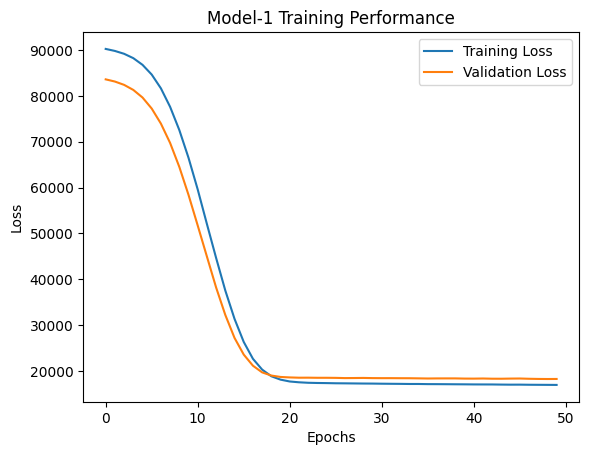

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model-1 Training Performance')
plt.legend()
plt.show()

In [16]:
predictions = model1.predict(X_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


array([[296.59976],
       [257.60788],
       [261.89258],
       [209.71498],
       [342.37488],
       [297.84982],
       [315.15085],
       [298.4495 ],
       [292.27414],
       [290.32474],
       [240.1617 ],
       [261.82913],
       [284.2227 ],
       [226.75856],
       [295.83527],
       [322.71353],
       [246.88603],
       [323.58142],
       [312.82437],
       [247.17796],
       [267.09976],
       [280.16   ],
       [272.9207 ],
       [271.46445],
       [253.83023],
       [248.05728],
       [260.89093],
       [306.6874 ],
       [321.40952],
       [268.88922],
       [237.09195],
       [309.88004],
       [297.7623 ],
       [265.84476],
       [322.47552],
       [285.6556 ],
       [214.84961],
       [255.53905],
       [281.01474],
       [235.71776],
       [250.44846],
       [263.4631 ],
       [239.37457],
       [248.36963],
       [263.9841 ],
       [253.62898],
       [268.06384],
       [258.15726],
       [289.44394],
       [290.7546 ],


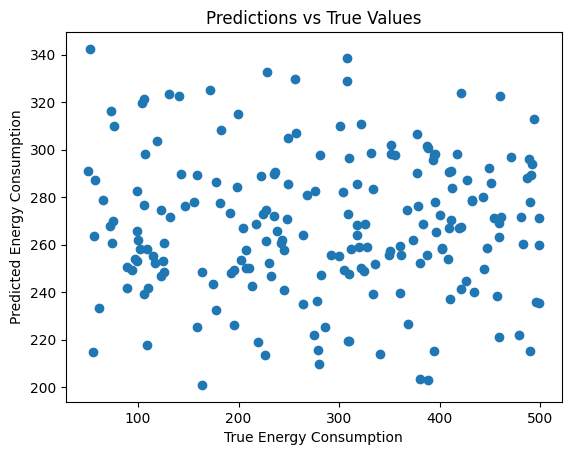

In [17]:
plt.scatter(y_test, predictions)
plt.xlabel('True Energy Consumption')
plt.ylabel('Predicted Energy Consumption')
plt.title('Predictions vs True Values')
plt.show()